#  Original and Mask Images Prepare

In [3]:
from PIL import Image
import os

import numpy as np

def convert_one_channel(img):
    #some images have 3 channels , although they are grayscale image
    if len(img.shape) > 2:
        img=img[:,:,0]
        return img
    else:
        return img

def pre_images(resize_shape,path):
    dirs=os.listdir(path)
    l = []
    dirs.sort()
    for i in range (1,len(dirs)+1):
        img=Image.open(path+str(i)+'.png')
        img=img.resize((resize_shape),Image.ANTIALIAS)
        img=convert_one_channel(np.asarray(img))
        l.append(img)
    return l

In [4]:
! git clone https://github.com/RobertSmithers/TeethSegmentation.git

Cloning into 'TeethSegmentation'...
remote: Enumerating objects: 844, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 844 (delta 12), reused 27 (delta 11), pack-reused 815
Receiving objects: 100% (844/844), 589.31 MiB | 16.32 MiB/s, done.
Resolving deltas: 100% (117/117), done.
Checking out files: 100% (375/375), done.


In [5]:
import sys
sys.path.append("/content/TeethSegmentation")

In [6]:
%cd '/content/TeethSegmentation/'

/content/TeethSegmentation


In [7]:
og_path1 = '/content/TeethSegmentation/data/original_img/'
masked_path2 = '/content/TeethSegmentation/data/masked_img/'

resize_shape = (3104,1200)
og_img = pre_images(resize_shape, og_path1)

mask_img = pre_images(resize_shape, masked_path2)

# Save New Resized Images

*Re-uploaded into data folder in Github

In [ ]:
from google.colab import files
import cv2
import os
from PIL import Image
import glob
import os.path 
import time


def save_images(l):
  for i in range(len(l)):
    im = Image.fromarray(l[i])
    x = i + 1
    im.save(str(x)+'.png')

def download_images(l):
  i = 1
  while i < (len(l)+1):
    files.download(str(i)+ '.png')
    i = i + 1
    time.sleep(60)

save_images(og_img)
download_images(og_img)

#files.download(str(1)+ '.png')

In [ ]:
save_images(mask_img)
download_images(mask_img)

#files.download(str(116)+ '.png')

# Testing

View a specific original image and its masked image

Note: There are 116 original images (1.png to 116.png)

So, if you want to see image 116.png do: og_img[115,:,:,:]

See below for random_number example

63


(-0.5, 3103.5, 1199.5, -0.5)

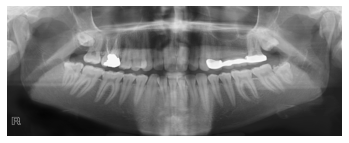

In [10]:
#Check
import random
import matplotlib.pyplot as plt
random_number=random.randint(1,116)
print(random_number)

#Checking data X and Y matching

#Shows img of random_number
plt.imshow(og_img[random_number-1], cmap = 'gray')
plt.axis('off')

#Example shows 63.png

63


(-0.5, 3103.5, 1199.5, -0.5)

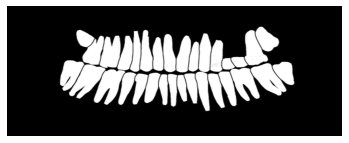

In [11]:
#Checking data X and Y matching
print(random_number)

#Shows img of random_number
plt.imshow(mask_img[random_number-1], cmap = 'gray')
plt.axis('off')

#Example shows 63.png